In [1]:
import numpy as np
import pandas as pd

from NU_utils import load_eda_statistic_pd,reduce_mem_usage

import os
import gc

import matplotlib.pyplot as plt
import seaborn as sns

import dill as pickle

from catboost import Pool

In [ ]:
train = pd.read_csv("data/train/0.csv")
target = pd.read_csv("data/train_label.csv")
test = pd.read_csv("data/test/828.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")
print("{} observations and {} features in {} train set.".format(train.shape[0],train.shape[1], len(os.listdir("data/train"))))
print("{} observations and {} features in {} test set.".format(test.shape[0],test.shape[1],len(os.listdir("data/test"))))
print("train : test row ratio {} and file {}".format(train.shape[0] / test.shape[0], len(os.listdir("data/train"))/len(os.listdir("data/test"))))

In [ ]:
def plot_feature_linechart(df, features, target = False, save = False, filename = ""):
    """
    feature들의 linechart 그려주는 함수
    argument:
        df - (pd.dataframe) DataFrame
        features - 그릴 feature 들
    """
    if target == True:
        ntarget = df[target].value_counts().keys().values #(string np.array) target feature의 class 확인
        subdf = [df.loc[df[target] == label] for label in ntarget] #(df list) df grouped by target, ntarget key 순서
    i = 0
    plt.figure()
    fig, ax = plt.subplots(8,8,figsize=(24,30))

    for feature in features:
        i += 1
        plt.subplot(8,8,i)
        if target == True:
            for _i,label in enumerate(ntarget):
                plt.plot(subdf[_i][feature])
        else:
            plt.plot(df[feature])
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=13, pad=0)
        plt.tick_params(axis='y', which='major', labelsize=10)
        #plt.legend()
    if save == True:
        plt.savefig(filename)

In [ ]:
count = 2
features = train.columns[1 + (64 *count) :65 + (64 *(count))]
plot_feature_linechart(train.iloc[0:20], features)

In [ ]:
for j in range(81):
    filename = "eda/linechart/" + str(0) +"/" + str(j)+ ".png"
    features = train.columns[1 + 64*j :65 + 64*j]
    plot_feature_linechart(train.iloc[0:20], features, 'target',True, filename)

In [ ]:
train.std()

In [ ]:
def plot_feature_distribution(df, features, target = None, save = False, filename = ""):
    """
    feature들의 histogram 그려주는 함수
    argument:
        df - (pd.dataframe) DataFrame
        features - 그릴 feature 들
    """
    if target != None:
        ntarget = df[target].value_counts().keys().values #(string np.array) target feature의 class 확인
        subdf = [df.loc[df[target] == label] for label in ntarget] #(df list) df grouped by target, ntarget key 순서
    i = 0
    plt.figure()
    fig, ax = plt.subplots(8,8,figsize=(24,30))

    for feature in features:
        i += 1
        plt.subplot(8,8,i)
        if target != None:
            for _i,label in enumerate(ntarget):
                sns.distplot(subdf[_i][feature], hist=True,label=label)
        else:
            for _i,label in enumerate(ntarget):
                sns.distplot(subdf[_i][feature], hist=True)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=13, pad=0)
        plt.tick_params(axis='y', which='major', labelsize=10)
        #plt.legend()
    if save == True:
        plt.savefig(filename)

In [ ]:
temp1 = train.copy()
temp2 = test.copy()
temp1["label"] = 0
temp2["label"] = 1
total = pd.concat([temp1, temp2])

In [ ]:
for i in range(total.shape[1]//64 + 1):
    count = i
    filename = "eda/distplot/"+ str(i) + ".png"
    features = train.columns[1 + (64 *count) : 65 + (64 *(count))]
    plot_feature_distribution(pd.concat([temp1,temp2]),features, target = "label",save = True, filename = filename)

In [11]:
with open('checkpoint1.pkl', 'rb') as f:
    data = pickle.load(f)

In [12]:
train = data["train"]
test = data["test"]

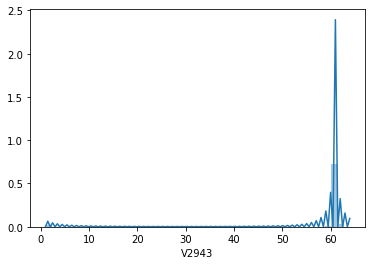

In [6]:
sns.distplot(train["V2943"])

In [9]:
sum(train["V2943"]< 60)

1153

In [10]:
train["V4422"]

KeyError: 'V4422'